In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

pro = ts.pro_api('7dd47ca4168785ae555abfbacc8cc5a46cc2a7f224ed3f66109052dc') #这里需要填写你注册好的Tushare的TOKEN凭证

In [2]:
ticker_data = pro.daily(ts_code='600377.SH')
print('数据量：',len(ticker_data))
ticker_data.head(5)

数据量： 4743


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600377.SH,20201201,9.60,9.67,9.60,9.63,9.61,0.02,0.2081,31723.78,30534.182
1,600377.SH,20201130,9.72,9.79,9.61,9.61,9.69,-0.08,-0.8256,43928.17,42614.705
2,600377.SH,20201127,9.55,9.75,9.50,9.69,9.56,0.13,1.3598,52671.71,50827.837
3,600377.SH,20201126,9.60,9.64,9.50,9.56,9.58,-0.02,-0.2088,28988.75,27696.967
4,600377.SH,20201125,9.64,9.71,9.57,9.58,9.62,-0.04,-0.4158,39329.20,37965.273


<AxesSubplot:title={'center':'股票代码:600377 - 宁沪高速'}, xlabel='trade_date'>

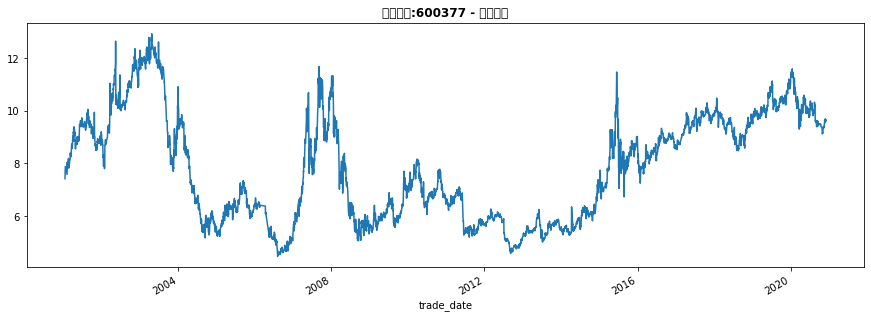

In [3]:
ticker_data['trade_date'] = pd.to_datetime(ticker_data['trade_date'],format='%Y%m%d')
ticker_data.set_index('trade_date', inplace=True)
returns = ticker_data["close"].pct_change().dropna()

plt.figure(figsize=(15, 5))
plt.title("股票代码:600377 - 宁沪高速", weight='bold')
ticker_data['close'].plot()

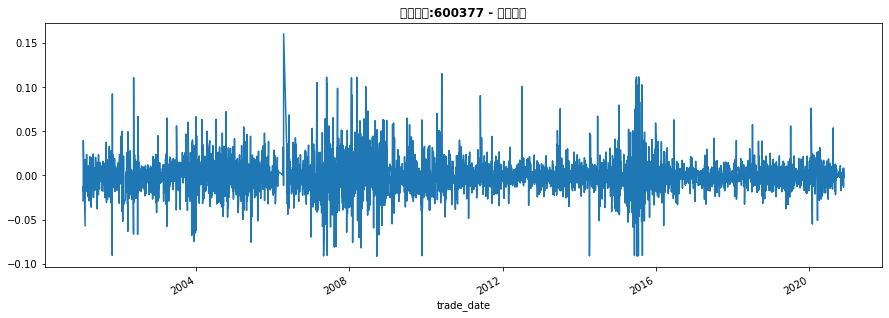

In [4]:
plt.figure(figsize=(15, 5))
ticker_data["close"].pct_change().plot()
plt.title("股票代码:600377 - 宁沪高速", weight='bold');

In [5]:
_,pvalue= scipy.stats.jarque_bera(returns)
print(pvalue)
if pvalue > 0.05:
    print ('数据服从正态分布')
else:
    print ('数据不服从正态分布')

0.0
数据不服从正态分布


Text(0.5, 1.0, '宁沪高速：收益回报的QQ图')

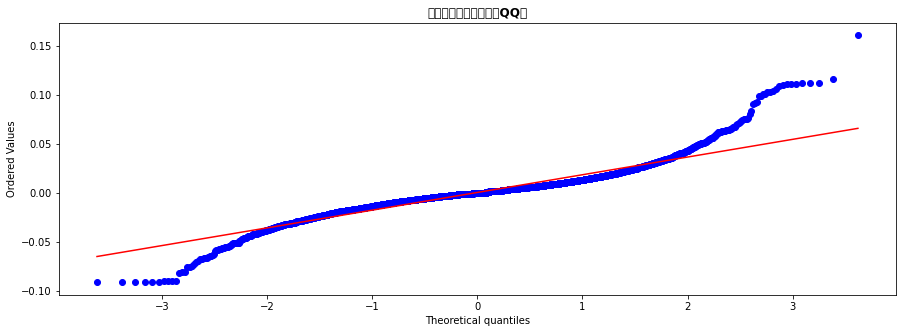

In [6]:
Q = returns.values
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure(figsize=(15, 5)).add_subplot(111))
plt.title(u"宁沪高速：收益回报的QQ图", weight="bold")